<a href="https://colab.research.google.com/github/siya2436/NYU-Data-Bootcamp-Midterm/blob/main/Midterm_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import files
!pip install yfinance
import yfinance as yf

# **PART 1: Data** **Collection**

### 1.Sock Price Data

##### TSLA historcial data from yahoofinance

In [ ]:
# Choose the research time period
tsla = yf.download("TSLA", start="2021-01-01", end="2022-12-31")
# Sort in reverse order, start from 2022
tsla_reversed = tsla.iloc[::-1]
# Display the data
tsla_reversed.head()

/tmp/ipython-input-2461645935.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  tsla = yf.download("TSLA", start="2021-01-01", end="2022-12-31")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2022-12-30,123.180000,124.480003,119.750000,119.949997,157777300
2022-12-29,121.820000,123.570000,117.500000,120.389999,221923300
2022-12-28,112.709999,116.269997,108.239998,110.349998,221070500
2022-12-27,109.099998,119.669998,108.760002,117.500000,208643400
2022-12-23,123.150002,128.619995,121.019997,126.370003,166989700


### 2.Sentiment Data

##### One Year of TSLA on Reddit （This dataset contains all the posts and comments mentioning the term "TSLA", spanning from July 5th, 2021 to July 4th, 2022）

In [ ]:
# Load dataset
df = pd.read_csv('/content/one-year-of-tsla-on-reddit-comments.csv')

# Drop missing rows
df = df.dropna()

# Convert 'created_utc' to readable datetime
df['created_datetime'] = pd.to_datetime(df['created_utc'], unit='s')

# Display the dataset with the new column (readable datetime)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

# show first 10 rows
df.head(10)

,type,id,subreddit.id,subreddit.name,subreddit.nsfw,created_utc,permalink,body,sentiment,score,created_datetime
0,comment,ievql0n,2rndg,valueinvesting,False,1656978625,https://old.reddit.com/r/ValueInvesting/comments/vrhtd9/developed_a_simple_value_index/ievql0n/,When TSLA was at 1K share price :\n\n8B sales/1B sales = $8/share \n$1000/$8= 125 \n\nThe stocks in the link are under 5 and most under 1 if I remember correctly.,0.2960,1,2022-07-04 23:50:25
1,comment,ievpqay,2qjfk,stocks,False,1656978201,https://old.reddit.com/r/stocks/comments/vrje7a/tesla_stocks/ievpqay/,"$TSLA will go down because you own the stock… the best way to make the price go up is to sell it… but seriously, there are many headwinds to all EV companies… why not buy a company that has big profits and tons of cash on the books? There’s no free ride, research now pays off later",0.2136,1,2022-07-04 23:43:21
3,comment,ievn2mn,2qstm,personalfinance,False,1656976905,https://old.reddit.com/r/personalfinance/comments/vrjf83/new_to_investing_serious_question_best_place_to/ievn2mn/,"&gt;What I mean is when I started investing, that's what came highly recommended , over and over and over. AMZN, TSLA, GOOGL, MSFT, NVDA,\n\nUm - I don't know who you were getting recommendations from but I wouldn't be going back to that well. Those are definitely not 'the basics' of anything.",0.7748,8,2022-07-04 23:21:45
4,comment,ievn0i7,2qstm,personalfinance,False,1656976877,https://old.reddit.com/r/personalfinance/comments/vrjf83/new_to_investing_serious_question_best_place_to/ievn0i7/,"I do trade in some ETFs.. DIV, SDIV ; USOI (it's an ETN.. Im not real sure, but my gut says buy buy buy so it might end up being a painful lesson!) AGNC (REIT I believe) .and you're right, every stock ive tried to pick myself (except IOVA) is down... But I got rid of most of my ""lottery picks""for AMZN, TSLA, and BABA &amp; MSFT ..Still got like 50 shares of Robinhood , broke even on SNAP finallyI, TNXP and DNA burnt me though.im looking at some ETFs seeing what they're buying",-0.5062,-2,2022-07-04 23:21:17
5,comment,ievmj40,2th52,wallstreetbets,False,1656976646,https://old.reddit.com/r/wallstreetbets/comments/vqv612/psny_yolo_this_is_fine/ievmj40/,"I think macro runs coming up. Sell and wait for the big crash before buying back in… At that point, yolo into TSLA instead",-0.1531,1,2022-07-04 23:17:26
6,comment,ievm458,35ufl,tsla,False,1656976446,https://old.reddit.com/r/TSLA/comments/vrejm7/musk_forced_to_halt_tesla_assembly_line_in/ievm458/,"All these $TSLA hit pieces sure make me want to buy more! The lamestream ""finance"" media still hasn't figured out the fact we're all on to their games now. \nLFG!!!",0.5815,1,2022-07-04 23:14:06
7,comment,ievlyli,2th52,wallstreetbets,False,1656976372,https://old.reddit.com/r/wallstreetbets/comments/vrfxqk/what_are_your_moves_tomorrow_july_05_2022/ievlyli/,$tsla still up 0.57% in the last year,0.0000,2,2022-07-04 23:12:52
8,comment,ievlvmx,37kf9c,tslalounge,False,1656976332,https://old.reddit.com/r/TSLALounge/comments/vpa8lw/tsla_weekend_super_chill_thread_2022_independence/ievlvmx/,I'm currently trying to wrap my head around the EUR/USD..\n\nSo let's say I bought TSLA from europe in EUR when EUR/USD was at 1.20. Now it is at 1.04. So that means that the stock was cheaper to buy as Europoor 1-2 years ago when the exchange was at 1.20 and now it go more expensive just because of the currency depreciation?\n\nThat basically means that my TSLA stock is keeping me safe from an € currency crash? Right? RIGHT?,0.2869,5,2022-07-04 23:12:12
9,comment,ievltu5,5mtdc4,muln,False,1656976308,https://old.reddit.com/r/Muln/comments/vr4cgp/david_michery_is_a_scammer/ievltu5/,"If you’re an experienced investor, you’ll know the “tricks of the trade,” of which these are some, to leverage a Public company. Why on earth would a company, like TSLA, ever go Public unless it were to fund their growth? No. 1 reason is that. � Happy Fourth, beer time…",0.8316,1,2022-07-04 23:11:48
10,

# **PART 2: FEATURES** **ANALYSIS**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**1. Calculate the average sentiment and average score for each date within the dataset.**

In [ ]:
#Convert the 'create_datetime' column to datetime format
df['created_datetime'] = pd.to_datetime(df['created_datetime'])

#Extract only the date part from the full datetime
#Help to group sentiment scores by calendar day
df['date'] = df['created_datetime'].dt.date

#Group the data by 'date' and calculate the average sentiment and average score
"""
'sentiment': sentiment value of a post
      (the higher the sentiment value is, the more positive the investor is)
'score': post score (upvotes)
"""
daily_sentiment = df.groupby('date', as_index=False).agg({'sentiment':'mean', 'score':'mean'}).rename(columns={'sentiment':'avg_sentiment', 'score':'avg_score'})

daily_sentiment.head(10)

,date,avg_sentiment,avg_score
0,2021-07-05,0.287702,4.600000
1,2021-07-06,0.118076,4.055276
2,2021-07-07,0.205677,4.123324
3,2021-07-08,0.158132,3.215159
4,2021-07-09,0.153914,2.822981
5,2021-07-10,0.212530,4.026316
6,2021-07-11,0.276663,3.941558
7,2021-07-12,0.134264,4.664198
8,2021-07-13,0.132096,6.118357
9,2021-07-14,0.107814,6.148148


**2. Integrate the stock price data to the sentiment dataset.**

In [ ]:
tsla = yf.download("TSLA", start=str(daily_sentiment['date'].min()), end=str(daily_sentiment['date'].max()))

#If columns are multi-level, flatten them
if isinstance(tsla.columns, pd.MultiIndex):
  tsla.columns = [' '.join(col).strip() for col in tsla.columns.values]

#Reset index and prepare date column
tsla = tsla.reset_index()
tsla['date'] = tsla['Date'].dt.date

#Choose appropriate price column
price_cols = [c for c in tsla.columns if 'Adj Close' in c or 'Close' in c]
price_col = price_cols[0] if len(price_cols)>0 else None

#Compute daily returns
tsla['return'] = tsla[price_col].pct_change()

#Convert daily_sentiment['date'] to datetime.date type
daily_sentiment['date'] = pd.to_datetime(daily_sentiment['date']).dt.date

#Merge the datasets
merged = pd.merge(daily_sentiment, tsla, on='date', how='inner')
merged.dropna(subset=['return'], inplace=True)

merged.head()

/tmp/ipython-input-4147364969.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  tsla = yf.download("TSLA", start=str(daily_sentiment['date'].min()), end=str(daily_sentiment['date'].max()))
[*********************100%***********************]  1 of 1 completed


,date,avg_sentiment,avg_score,Date,Close TSLA,High TSLA,Low TSLA,Open TSLA,Volume TSLA,return
1,2021-07-07,0.205677,4.123324,2021-07-07,214.883331,221.899994,212.773331,221.423340,56376000,-0.022636
2,2021-07-08,0.158132,3.215159,2021-07-08,217.603333,218.143326,206.820007,209.456665,68319900,0.012658
3,2021-07-09,0.153914,2.822981,2021-07-09,218.983337,219.636673,214.896667,217.726669,54421500,0.006342
4,2021-07-12,0.134264,4.664198,2021-07-12,228.566666,229.080002,220.720001,220.733337,77781000,0.043763
5,2021-07-13,0.132096,6.118357,2021-07-13,222.846664,231.093338,222.100006,228.773331,62898300,-0.025026


**3. Find the relation between the volume of TSLA and the average sentiment**

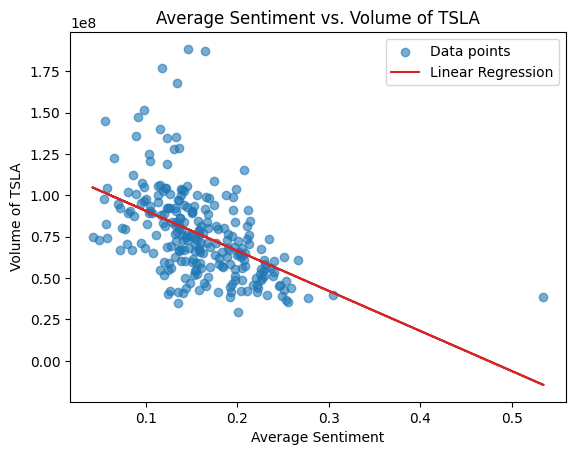

In [ ]:
from sklearn.linear_model import LinearRegression

#Create a scatter plot
#Show the relationship between the daily volume of TSLA and its daily average sentiment
plt.scatter(merged['avg_sentiment'],
      merged['Volume TSLA'],
      alpha=0.6,
      color='tab:blue',
      label='Data points')

#Prepare the data for linear regression
"""
Independent variable: 'avg_sentiment'
Dependent variable: 'Volume TSLA'
"""
X = merged['avg_sentiment'].values.reshape(-1, 1)
y = merged['Volume TSLA'].values

#Fit a linear regression model to see the trend between volume and sentiment
model = LinearRegression()
model.fit(X, y)

#Predict the sentiment values based on the fitted regression model
y_pred = model.predict(X)

#Plot the fitted regression line on the scatter plot
plt.plot(X, y_pred, color='tab:red', label='Linear Regression')

#Add a title and axis labels to the plot
plt.title('Average Sentiment vs. Volume of TSLA')
plt.xlabel('Average Sentiment')
plt.ylabel('Volume of TSLA')

#Show the legend to identify the scatter points and regression line
plt.legend()

The scatter plot and the linear regression line show that the volume of TSLA has a negative correlation to the average sentiment of TSLA.


It might imply that when Tesla's stock market is calm and optimism, the trading volume often declines since investors are content to hold. However, when sentiment turns fearful or uncertain, volume spikes as investors act.

**4**. **Downside semivariance (Rolling 7days)**

1). Calculate the downside semivariance and add the data into the merged dataset

In [ ]:
#Remove any rows where 'return' is missing
merged = merged.dropna(subset=['return'])

#Define downside semivariance function
"""
Downside semivariance meadures the variability of returns below the mean
It captures only the downside (negative) risk rather than overall volatility
"""
def downside_semivariance(x):
  #Compute the mean of the given return window
  mean = np.mean(x)
  #Select only the returns that fall below the mean
  downside = x[x < mean]
  #If no downside returns exist, downside risk = 0
  if len(downside) == 0:
    return 0

  #Average squared deviation below the mean
  return np.mean((downside - mean) ** 2)

#Compute 7-day downside semivariances
"""
rolling(window=7): creates a moving window of 7 trading days
apply(downside_semivariance): applies the 'downside_semivariance' function to each window
min_periods=1: allows computation even if fewer than 7 trading days are available
"""
win = 7
merged['downside_semivariance_7d'] = (merged['return']
    .rolling(window=7, min_periods=1)
    .apply(downside_semivariance, raw=False))

merged.head()

,date,avg_sentiment,avg_score,Date,Close TSLA,High TSLA,Low TSLA,Open TSLA,Volume TSLA,return,downside_semivariance_7d
1,2021-07-07,0.205677,4.123324,2021-07-07,214.883331,221.899994,212.773331,221.423340,56376000,-0.022636,0.000000
2,2021-07-08,0.158132,3.215159,2021-07-08,217.603333,218.143326,206.820007,209.456665,68319900,0.012658,0.000311
3,2021-07-09,0.153914,2.822981,2021-07-09,218.983337,219.636673,214.896667,217.726669,54421500,0.006342,0.000459
4,2021-07-12,0.134264,4.664198,2021-07-12,228.566666,229.080002,220.720001,220.733337,77781000,0.043763,0.000540
5,2021-07-13,0.132096,6.118357,2021-07-13,222.846664,231.093338,222.100006,228.773331,62898300,-0.025026,0.000722


2). Create a plot to show the downside semivariance of Tesla

Text(0, 0.5, 'Downside Semivariance')

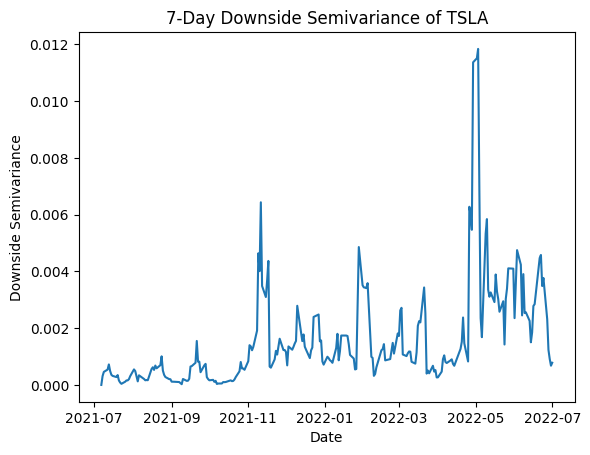

In [ ]:
#Create a plot
plt.plot(merged['date'], merged['downside_semivariance_7d'])

#Add a title and axis labels to the plot
plt.title('7-Day Downside Semivariance of TSLA')
plt.xlabel('Date')
plt.ylabel('Downside Semivariance')

**5. Crash indicator: 1 if return<-5%, else 0**

1). Define the crash indicator concept and add it into the merged dataset

In [ ]:
#Define the crash indicator and add a column 'crash_indicator' to the merged dataset
merged['crash_indicator'] = (merged['return']<-0.05).astype(int)

#Find out the days with the crash_indicator=1
merged[merged['crash_indicator']==1]

,date,avg_sentiment,avg_score,Date,Close TSLA,High TSLA,Low TSLA,Open TSLA,Volume TSLA,return,downside_semivariance_7d,crash_indicator
89,2021-11-09,0.118179,5.470291,2021-11-09,341.166656,391.500000,337.173340,391.200012,177317400,-0.119903,0.004637,1
106,2021-12-03,0.124353,7.118380,2021-12-03,338.323334,363.526672,333.403320,361.596680,92322000,-0.064199,0.001356,1
110,2021-12-09,0.159097,4.256809,2021-12-09,334.600006,354.163330,334.119995,353.546661,59438400,-0.060956,0.001551,1
115,2021-12-16,0.101447,4.138577,2021-12-16,308.973328,331.660004,307.283325,331.500000,82771500,-0.050277,0.001346,1
128,2022-01-05,0.186029,4.582205,2022-01-05,362.706665,390.113342,360.336670,382.216675,80119800,-0.053471,0.000871,1
134,2022-01-13,0.136441,4.066272,2022-01-13,343.853333,371.866669,342.179993,369.690002,97209900,-0.067491,0.001196,1
139,2022-01-21,0.139914,4.655544,2022-01-21,314.633331,334.850006,313.500000,332.113342,103416000,-0.052566,0.001057,1
143,2022-01-27,0.091411,5.315730,2022-01-27,276.366669,311.796661,276.333344,311.119995,147109500,-0.115542,0.002637,1
158,2022-02-17,0.115728,3.549669,2022-02-17,292.116669,306.166656,291.366669,304.420013,55178400,-0.050943,0.001436,1
161,2022-02-23,0.094878,5.106459,2022-02-23,254.679993,278.433319,253.520004,276.809998,95256900,-0.069979,0.001206,1


2). Create a plot to show all the dates that crash indicator occured

Text(0, 0.5, 'Crash Indicator')

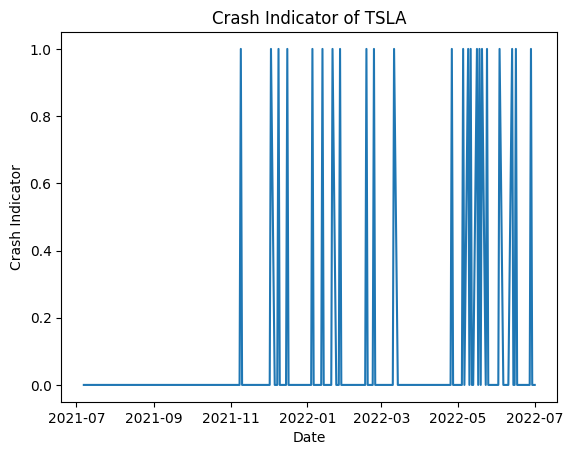

In [ ]:
#Create a plot to show all the dates that crash indicator occured
plt.plot(merged['date'], merged['crash_indicator'])

#Add a title and axis labels to the plot
plt.title('Crash Indicator of TSLA')
plt.xlabel('Date')
plt.ylabel('Crash Indicator')

3). Use a scatterplot with the crash days highlighted to show the correlation between average sentiment and 7-days downside semivariance

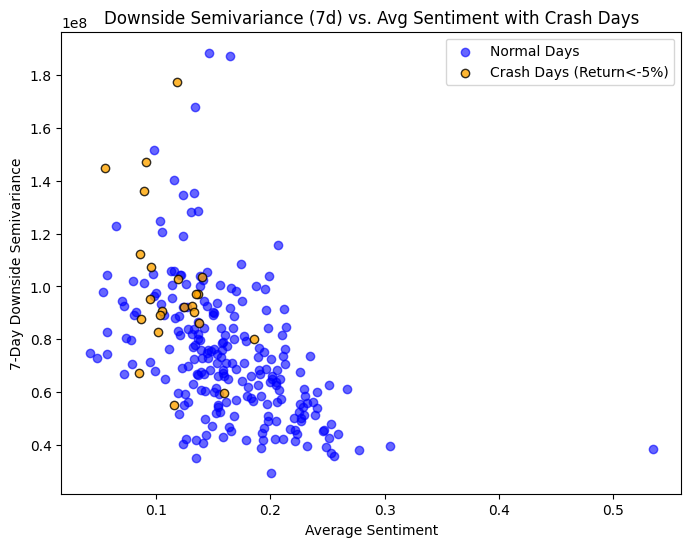

In [ ]:
#Separate crash and non-crash days
crash_mask = merged['crash_indicator'] == 1
non_crash_mask = merged['crash_indicator'] == 0

#Plotting
plt.figure(figsize=(8, 6))

#Non-crash days
plt.scatter(X[non_crash_mask],y[non_crash_mask],
    color='blue', alpha=0.6, label='Normal Days')

#Crash days
plt.scatter(X[crash_mask],y[crash_mask],
    color='orange', alpha=0.8,
    label='Crash Days (Return<-5%)',
    edgecolor='k')

#Add a title and axis labels to the scatterplot
plt.title('Downside Semivariance (7d) vs. Avg Sentiment with Crash Days')
plt.xlabel('Average Sentiment')
plt.ylabel('7-Day Downside Semivariance')

#Show the legend to identify the scatter points and regression line
plt.legend()

**a). As sentiment decreases, 7-day downside semivariance increases:** When the average market sentiment becomes more negative, the market experiences higher levels of bad volatility (downside risk). This is an intuitive relationship, showing that as investors and commentators become more pessimistic, prices fall more sharply and frequently.

**b). Cluster of crash days:** The "crash days" are almost exclusively clustered in the top-right quadrant of the scatterplot, which means:

*   High downside semivariance
*   Low average sentiment

**6. Use a plot to show the correlation between Tesla's returns and its daily sentiment**

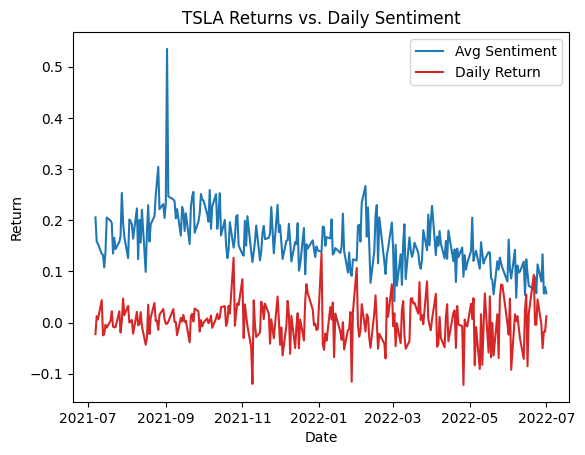

In [ ]:
#Plot the average daily sentiment of TSLA over time
plt.plot(merged['date'], merged['avg_sentiment'], label='Avg Sentiment', color='tab:blue')

#Plot the daily stock return of TSLA on the same chart
plt.plot(merged['date'], merged['return'], label='Daily Return', color='tab:red')

#Add title and labels
plt.title('TSLA Returns vs. Daily Sentiment')
plt.xlabel('Date')
plt.ylabel('Return')

#Display the legend to distinguish between the two plotted lines
plt.legend()

The plots show that the correlation between daily average sentiment and Tesla's daily returns is generally positive, but various influencing factors make the correlation complex as well.

*   **Generally Positive Relationship:** There are likely periods where relatively higher sentiment coincided with positive returns, and relatively lower sentiment with negative returns.
*   **Volatile Periods Exist:** November 2021 and the beginning of 2022.
*   **Potential Lag Effects:** The relationship was not perfectly simultaneous. In most cases, the plots demonstrate that sentiment may lead to returns or vice versa under different market conditions.
*   **Turning Points:** Sentiment sometimes provided early warning signals before major price moves.
*   **In December 2021:** Strong positive correlation between sentiment and Tesla's daily returns, which aligns with the fact that Tesla was in a bull market at that time.
*   **From March 2022 to July 2022:** Sentiment was generally decreasing, leading returns downward. Such fear might be caused by the rising rate in 2022.










**7. Comparing the distribution of Tesla's returns and its sentiment**

Text(0.5, 1.0, 'Distribution of Average Sentiment')

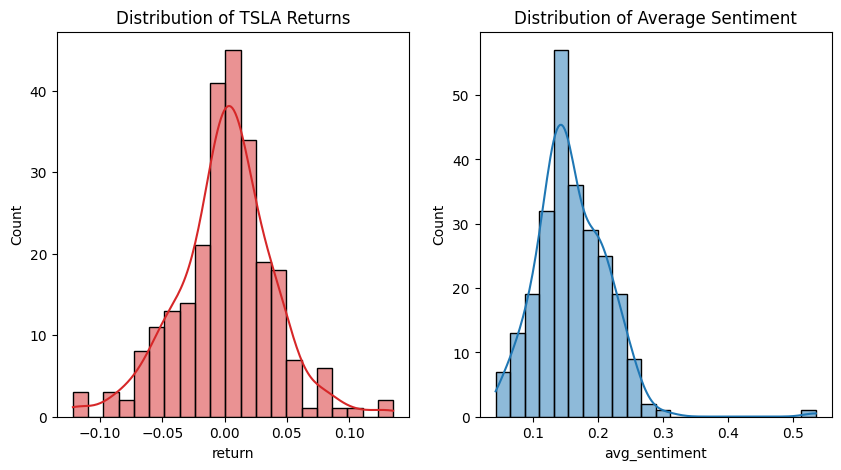

In [ ]:
#Create a figure with two subplots
fig, axes = plt.subplots(1,2, figsize=(10,5))

#Left subplot: a histogram of TSLA daily returns
sns.histplot(merged['return'], ax=axes[0], kde=True, color='tab:red')
axes[0].set_title('Distribution of TSLA Returns')

#Right subplot: a histogram of average sentiment values
sns.histplot(merged['avg_sentiment'], ax=axes[1], kde=True, color='tab:blue')
axes[1].set_title('Distribution of Average Sentiment')

Histograms and kernel density estimates showed that Tesla’s returns were positively skewed with heavy tails, whereas sentiment scores clustered slightly above zero with moderate dispersion.
This suggests that investors were generally somewhat optimistic on average, but sentiment fluctuated sharply during turbulent periods.

**8. Heatmap of the relation between sentiment and risk features**

In [ ]:
#Lagged sentiment (1-day and 3-day)
merged['sentiment_lag1'] = merged['avg_sentiment'].shift(1)
merged['sentiment_lag3'] = merged['avg_sentiment'].shift(3)

Text(0.5, 1.0, 'Correlation Heatmap: Sentiment & Risk Features')

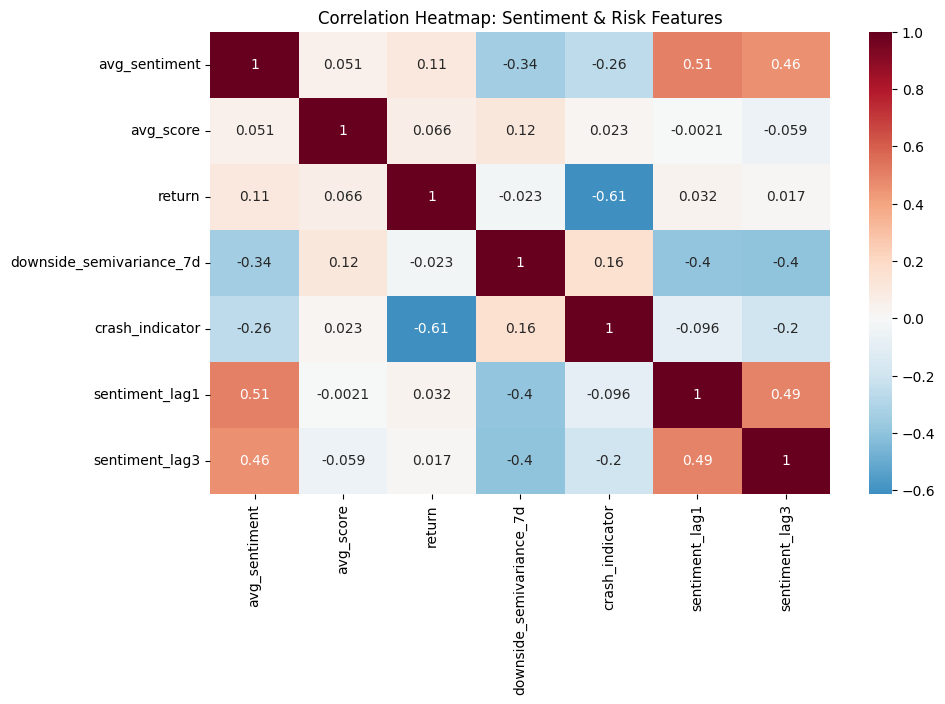

In [ ]:
plt.figure(figsize=(10, 6))

#Compute the correlation matrix among selected sentiment and risk related variables
corr = merged[['avg_sentiment',
        'avg_score',
        'return',
        'downside_semivariance_7d',
        'crash_indicator',
        'sentiment_lag1',
        'sentiment_lag3']].corr()

#Plot the correlation matrix as a heatmap
sns.heatmap(corr, annot=True, cmap='RdBu_r', center=0)

#Add a title to the heatmap
plt.title("Correlation Heatmap: Sentiment & Risk Features")

From the heatmap we can conclude that:


*   **Sentiment and Downside Risk:** has moderate negative correlation (-0.34), meaning higher sentiment is associated with lower downside risk. Thus, positive sentiment reduces the likelihood of sharp price drops.
*   **Sentiment and Crash Probability:** has moderate negative correlation (-0.26), meaning that higher sentiment reduces crash likelihood. It is consistent with the downside semivariance relationship but slighly weaker.
*   **Lagged Sentiment Effects are crucial:** the correlation between sentiment_lag1, sentiment_lag3 and the downside_semivariance_7d show that yesterday's sentiment negatively correlates with today's downside risk. Higher sentiment from previous days actually predicts lower future downside risk.




#**Part 3：Quantitative Modeling**

##**Poisson--Normal Mixture: Definition and Cumulant Generating Function**

**Model Definition**

Let the log return $x$ be normally distributed conditional on a Poisson random variable $j$:
$$
x \mid j \sim \mathcal{N}(\mu - j\theta,\, \sigma^2 + j\rho^2),
\qquad j \sim \text{Poisson}(\omega),
$$
where the parameters are defined as follows:

**Parameters:**

- $\mu$: average log return in normal (non-disaster) periods  
- $\sigma > 0$: baseline volatility  
- $\theta > 0$: downward shift in the mean when a disaster occurs  
- $\rho > 0$: increase in variance during a disaster  
- $\omega > 0$: Poisson intensity, representing the expected frequency of disasters


---

**Cumulant** **Generating** **Function** (**CGF**)

The cumulant generating function (cgf) of $x$ is
$$
\boxed{
k_x(s)
= \log \mathbb{E}\!\left[e^{s x}\right]
= s\mu + \frac{s^2\sigma^2}{2}
  + \omega\!\left(e^{-s\theta + \tfrac{s^2\rho^2}{2}} - 1\right)
}.
$$
The first term $s\mu + s^2\sigma^2 / 2$ represents the normal Gaussian variation,
while the exponential term adds the effect of rare, Poisson-driven ''disaster'' shocks.

---

**First** **Four Cumulants**

Differentiating $k_x(s)$ with respect to $s$ and evaluating at $s=0$ yields:
$$
\begin{aligned}
\kappa_1 &= \mu - \omega\theta, \\[4pt]
\kappa_2 &= \sigma^2 + \omega(\theta^2 + \rho^2), \\[4pt]
\kappa_3 &= -\,\omega\,\theta(\theta^2 + 3\rho^2), \\[4pt]
\kappa_4 &= \omega(\theta^4 + 6\theta^2\rho^2 + 3\rho^4).
\end{aligned}
$$
These cumulants correspond respectively to the mean, variance, skewness, and kurtosis
of the model-implied log-return distribution.

---

**Standardized Skewness and Kurtosis**

From the cumulants above, the standardized higher moments are given by
$$
\boxed{
\gamma_1 = \frac{\kappa_3}{\kappa_2^{3/2}},
\qquad
\gamma_2 = 3 + \frac{\kappa_4}{\kappa_2^2}.
}
$$
If the process were purely normal (no disasters), $\kappa_3 = \kappa_4 = 0$,
so $\gamma_1 = 0$ and $\gamma_2 = 3$ as expected.

---

**Special** **Cases**

\paragraph{Type I (Mean shift only, $\rho = 0$):}
$$
k_x(s) = s\mu + \frac{s^2\sigma^2}{2} + \omega(e^{-s\theta} - 1),
$$
$$
\kappa_2 = \sigma^2 + \omega\theta^2, \quad
\kappa_3 = -\omega\theta^3, \quad
\kappa_4 = \omega\theta^4,
$$
$$
\gamma_1 = \frac{-\omega\theta^3}{(\sigma^2 + \omega\theta^2)^{3/2}},
\qquad
\gamma_2 = 3 + \frac{\omega\theta^4}{(\sigma^2 + \omega\theta^2)^2}.
$$
**Interpretation**:The model produces negative skewness and excess kurtosis;
increasing $\omega$ or $\theta$ leads to heavier left tails (greater downside risk).

---

**Type II (Variance shift only, $\theta = 0$):**
$$
k_x(s) = s\mu + \frac{s^2\sigma^2}{2} + \omega(e^{s^2\rho^2/2} - 1),
$$
$$
\kappa_2 = \sigma^2 + \omega\rho^2, \quad
\kappa_3 = 0, \quad
\kappa_4 = 3\omega\rho^4,
$$
$$
\gamma_1 = 0,
\qquad
\gamma_2 = 3 + \frac{3\omega\rho^4}{(\sigma^2 + \omega\rho^2)^2}.
$$
**Interpretation**: The distribution remains symmetric but exhibits fatter tails,
capturing episodes of elevated volatility without introducing asymmetry.

---

**Type III (Both mean and variance shifts, $\theta>0$, $\rho>0$**):
$$
\kappa_2 = \sigma^2 + \omega(\theta^2 + \rho^2), \quad
\kappa_3 = -\omega\theta(\theta^2 + 3\rho^2), \quad
\kappa_4 = \omega(\theta^4 + 6\theta^2\rho^2 + 3\rho^4).
$$
**Interpretation**: This case combines negative skewness and heavy tails,
representing realistic situations in which market crashes are accompanied by surges in volatility.


##**Model Choice: Type I Poisson--Normal Mixture**

In this study, we adopt the **Type I** specification of the Poisson--Normal
Mixture (PNM) model. This version assumes that disasters cause a downward shift
in the mean return but do not alter the variance, that is, $\rho = 0$.
Accordingly, the log return conditional on the number of disaster events $J$
is given by
$$
x \mid J \sim \mathcal{N}(\mu - J\theta,\, \sigma^2),
\qquad J \sim \text{Poisson}(\omega).
$$
The corresponding cumulant generating function is
$$
k_x(s) = s\mu + \frac{s^2\sigma^2}{2} + \omega\left(e^{-s\theta} - 1\right),
$$
which introduces asymmetric left-tail risk through the parameters $\theta$
(disaster size) and $\omega$ (disaster frequency), while keeping the overall
diffusion volatility $\sigma$ constant.

This specification is appropriate for our analysis because the project's goal
is to examine how investor sentiment affects **downside or crash risk.**
The **Type I** model directly captures such ''rare disaster'' events as infrequent,
negative jumps in returns, generating negative skewness without changing
volatility. In contrast, the **Type II** and **Type III** formulations incorporate
time-varying volatility or joint mean--variance shifts, which are more suitable
for studying volatility clustering rather than asymmetric crash dynamics.



**1. Estimate parameters (μ, σ, θ, ω) by method of moments**

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import skew, kurtosis

# Compute sample moments and cumulants
def sample_cumulants(x):
  """
  Compute the first four sample cumulants from a return series x.

  Inputs:
      x: array-like, returns (e.g., 60-day log returns)

  Returns:
      k1: mean (1st cumulant)
      k2: variance (2nd cumulant)
      k3: third cumulant (used for skewness)
      k4: fourth cumulant (used for kurtosis, adjusted)
  """
  m1 = np.mean(x)                          # 1st cumulant: sample mean
  c2 = np.var(x)                           # 2nd cumulant: sample variance
  c3 = np.mean((x - m1)**3)                # 3rd moment → skewness
  k4 = np.mean((x - m1)**4) - 3 * c2**2    # 4th cumulant = raw 4th moment - 3*(variance)^2
  return m1, c2, c3, k4


# Estimate Poisson Mixture of Normals parameters

def mom_estimate_pmn(x, eps=1e-12):
  """
  Estimate parameters (μ, σ, θ, ω) of the Poisson Mixture of Normals model
  via the Method of Moments (MoM).

  Model:
      r_t = μ - j_t * θ + ε_t
      j_t ~ Poisson(ω)   # frequency of rare disasters
      ε_t ~ N(0, σ²)     # normal noise term

  Inputs:
      x : array-like, return observations
      eps : small tolerance to avoid division by zero

  Returns:
      μ : mean of normal state (average return)
      σ : standard deviation of normal shocks
      θ : disaster magnitude (average drop size)
      ω : disaster frequency (rate parameter)
  """
  # compute sample cumulants (moments)
  k1, k2, k3, k4 = sample_cumulants(x)

  # check that higher-order moments are valid
  # If skewness or kurtosis are too small or invalid, skip estimation
  if abs(k3) < eps or k4 <= eps:
    return (np.nan,) * 4

  # derive disaster magnitude θ = -k4 / k3
  # θ measures how severe the disaster is (how far the left tail extends)
  θ = -k4 / k3
  if θ <= eps:
    return (np.nan,) * 4

  # derive disaster frequency ω = k4 / θ^4
  # ω determines how often disaster jumps occur
  ω = k4 / (θ**4)

  # compute mean return μ = k1 + ωθ
  # The expected return adds back the downward jump adjustment
  μ = k1 + ω * θ

  # compute normal volatility σ² = k2 - ωθ²
  # The total variance minus the variance contribution from disaster jumps
  σ2 = k2 - ω * (θ**2)

  # validate that σ² and ω are positive
  if σ2 <= eps or ω < eps:
    return (np.nan,) * 4

  # return estimated parameters
  # μ = mean return in normal conditions
  # σ = standard deviation of normal shocks
  # θ = average disaster loss (magnitude)
  # ω = disaster intensity (frequency)
  return μ, np.sqrt(σ2), θ, ω

**2. Regression — Does sentiment drive disaster intensity (ω)?**


**Explanation** :

This part of the analysis aims to understand what drives the intensity of extreme negative market events — situations where asset prices suddenly fall much more than usual.
To study this, we use a statistical model called the Poisson–Normal mixture model, which combines two sources of randomness:

Normal variation, representing ordinary day-to-day market fluctuations; and

Poisson “disaster” shocks, representing rare but severe events, like sudden crashes or liquidity crises.

Each period’s market return is therefore seen as the result of both normal noise and the small chance of a “disaster” happening. The model has four parameters:


*  μ (mu) – the average or “normal” return level,





*  σ (sigma) – the usual volatility of returns,





*  θ (theta) – how large the drop is when a disaster occurs,


*  ω (omega) – how frequently such disasters are expected to occur (called
disaster intensity).


                            OLS Regression Results                            
Dep. Variable:              omega_hat   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.317
Method:                 Least Squares   F-statistic:                     1.754
Date:                Fri, 24 Oct 2025   Prob (F-statistic):              0.180
Time:                        01:07:22   Log-Likelihood:                -26.969
No. Observations:                  83   AIC:                             59.94
Df Residuals:                      80   BIC:                             67.19
Df Model:                           2                                         
Covariance Type:                  HAC                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.5702      0.862      1.

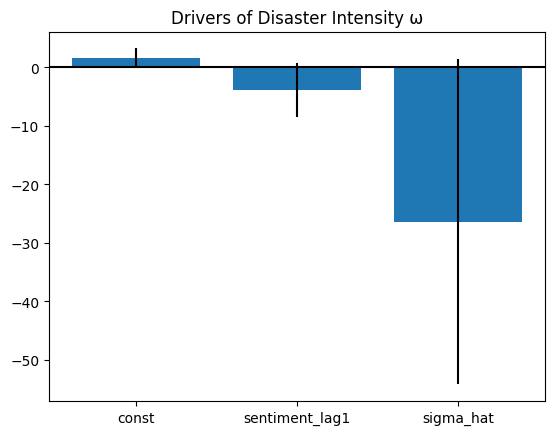

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np


# 1. Data preparation

# Calculate log returns
merged['r_log'] = np.log(1 + merged['return'])

# Function to apply MoM estimation over a rolling window
def apply_mom_rolling(series, window):
  results = []
  for i in range(len(series)):
    if i < window - 1:
      results.append((np.nan, np.nan, np.nan, np.nan))
    else:
      window_data = series.iloc[i - window + 1 : i + 1]
      results.append(mom_estimate_pmn(window_data))
  return pd.DataFrame(results, index=series.index, columns=['mu_hat', 'sigma_hat', 'theta_hat', 'omega_hat'])

# Apply the rolling MoM estimation
window_size = 60
estimated_params = apply_mom_rolling(merged['r_log'], window_size)

# Join the estimated parameters back to the merged DataFrame
merged = merged.join(estimated_params)


# Calculate lagged sentiment
merged['sentiment_lag1'] = merged['avg_sentiment'].shift(1)

# Drop observations with missing values in key variables
# omega_hat: estimated disaster intensity (dependent variable)
# sent_lag1: lagged investor sentiment (independent variable)
# sigma_hat: estimated volatility (independent variable)
reg = merged.dropna(subset=["omega_hat", "sentiment_lag1", "sigma_hat"])


# Define the independent variables (X)
# Add a constant term for the regression intercept
X = sm.add_constant(reg[["sentiment_lag1", "sigma_hat"]])

# Define the dependent variable (y)
y = reg["omega_hat"]


# 2. Run OLS regression with robust (HAC) standard errors

# cov_type="HAC" applies the Newey–West correction for
# heteroskedasticity and autocorrelation
# cov_kwds={"maxlags":5} means we allow correlation up to 5 lags
ols = sm.OLS(y, X).fit(cov_type="HAC", cov_kwds={"maxlags": 5})

# Display regression summary: coefficients, t-stats, p-values, R², etc.
print(ols.summary())


# 3. Extract coefficients and plot results

# ols.params : estimated coefficients
# ols.bse: robust standard errors
coef, err = ols.params, ols.bse

# Create a bar chart with 95% confidence intervals (±1.96 × std error)
plt.bar(coef.index, coef.values, yerr=1.96 * err.values)

# Add a horizontal reference line at zero and a title
plt.axhline(0, color='k')
plt.title("Drivers of Disaster Intensity ω")

# Show the plot
plt.show()

**Key** **Findings**

1. Negative coefficient on sentiment (-3.85):

    The relationship between investor sentiment and disaster intensity is negative. This suggests that when market sentiment is high (i.e., investors are more optimistic), the estimated probability of a disaster tends to decline. Conversely, when sentiment drops, the model detects a higher risk of extreme downturns.
    
    However, the p-value (≈ 0.105) indicates that this effect is not statistically significant at the 5% level, meaning we cannot be fully confident that the relationship is not due to chance — though it is close enough to suggest a meaningful trend.



2. Negative coefficient on volatility (-26.37):

    The estimated volatility (σ̂) also shows a negative association with ω̂. At first, this might seem counterintuitive — we might expect higher volatility to signal more frequent disasters.
    
    One possible interpretation is that ω̂ and σ̂ capture different forms of risk: σ̂ represents normal day-to-day fluctuations, while ω̂ represents rare, jump-like disasters. When ordinary volatility is high, some of the variation that would otherwise be labeled “disaster risk” may already be absorbed by normal fluctuations, leading to a lower ω̂ estimate.
    
    This effect is marginally significant (p ≈ 0.063), suggesting a possible but not definitive link.

3. Model fit:

    The R-squared value (0.334) indicates that about one-third of the variation in ω̂ is explained by sentiment and volatility. For noisy financial data, this is a reasonable explanatory power.

**3. Model-Consistency Check**

Explanation: Comparing Empirical and Model-Implied Skewness and Kurtosis

This section tests whether the Poisson–Normal mixture model can accurately describe the shape of the return distribution observed in real data — specifically, its asymmetry (skewness) and fat tails (kurtosis).


In [ ]:
# 1. Compute rolling sample skewness and kurtosis

# For each rolling window of length 'win', calculate:
# skew_roll: sample skewness of log returns (r_log)
# kurt_roll: sample kurtosis of log returns (r_log)
# Using scipy.stats.skew and kurtosis functions
# fisher=False → uses the "Pearson" definition where Normal distribution has kurtosis = 3
merged["skew_roll"] = merged["r_log"].rolling(win).apply(lambda x: skew(x, False))
merged["kurt_roll"] = merged["r_log"].rolling(win).apply(lambda x: kurtosis(x, fisher=False))


# 2. Compute theoretical skewness and kurtosis from the model

# The Poisson–Normal mixture model implies specific formulas for higher moments.
# Recall from class:
#   κ2 = σ^2 + ωθ^2
#   κ3 = -ωθ^3
#   κ4 = ωθ^4 + 3κ2^2
# Then standardized skewness γ1 = κ3 / κ2^(3/2)
# and standardized kurtosis γ2 = κ4 / κ2^2
# We reproduce these theoretical quantities below:

# 'den' represents κ2, the model-implied variance term (σ² + ωθ²)
den = merged["sigma_hat"]**2 + merged["omega_hat"] * (merged["theta_hat"]**2)

# Model-implied skewness (γ1) = (- ω θ³) / (κ2)^(3/2)
merged["skew_model"] = (-merged["omega_hat"] * (merged["theta_hat"]**3)) / (den**1.5)

# Model-implied kurtosis (γ2) = (ω θ⁴)/(κ2)² + 3
# (+3) ensures that a Normal distribution has kurtosis = 3
merged["kurt_model"] = (merged["omega_hat"] * (merged["theta_hat"]**4)) / (den**2) + 3


# 3. Evaluate model performance: empirical vs theoretical moments

# Keep only observations with non-missing rolling and model values
fit = merged[["skew_roll", "skew_model", "kurt_roll", "kurt_model"]].dropna()

# Compute correlations between rolling sample moments and model-implied moments
# High correlation → model captures empirical skewness/kurtosis well
print("corr(skew) =", fit["skew_roll"].corr(fit["skew_model"]))
print("corr(kurt) =", fit["kurt_roll"].corr(fit["kurt_model"]))

corr(skew) = 0.4452367421688395
corr(kurt) = -0.0939333168173214


**Interpretation of Model Performance**

The correlations between the model-implied and empirical moments provide insight into how well the Poisson–Normal mixture model captures the true shape of market returns.

The correlation for skewness (0.45) is moderately positive, indicating that the

*  The correlation for skewness (0.45) is moderately positive, indicating that the model can partially explain the asymmetry in return distributions — that is, periods with more downside risk tend to be reflected in higher model-implied skewness.
*  In contrast, the correlation for kurtosis (–0.09) is essentially zero, suggesting that the model fails to reproduce the dynamics of tail thickness or the frequency of extreme market moves.


This contrast reveals an important insight rather than a failure:

    Real-world market fluctuations are more extreme and complex than the “rare disaster” mechanism

In [ ]:
print(len(fit))
fit.head()


83


,skew_roll,skew_model,kurt_roll,kurt_model
64,0.173490,-0.120496,2.574491,3.078426
65,-0.863822,-0.145806,2.738071,3.248079
66,0.107644,-0.201450,2.318423,3.392834
67,0.210381,-0.188585,2.006215,3.348122
68,-0.340388,-0.234956,2.321066,3.411344


**4. Structural Prediction of Tail Events**

This section estimates the probability of a market crash under the Poisson–Normal mixture model and tests how well the model aligns with reality.

A 5% drop in log returns is defined as a “crash.” Using the estimated parameters (μ̂, σ̂, θ̂, ω̂), the model predicts crash probabilities by combining two regimes: a normal state and a rare disaster state. The predicted probability is then compared with actual crash occurrences in the data. Observations are grouped into quintiles based on predicted risk, and the realized crash frequency in each group is computed.

If higher predicted probabilities correspond to more actual crashes, it indicates that the model successfully captures extreme downside risk.

In [ ]:
from scipy.stats import norm

# 1. Define a crash threshold and helper function

# τ (tau) = log(1 - 0.05) ≈ -0.0513
# This represents a 5% crash in log-return terms.
# Any return smaller than τ (≈ -5%) will be considered a "crash".
τ = np.log(1 - 0.05)

def p_crash(row):
  """
  Compute the model-implied probability of a crash (Pr[r < τ])
  under the Poisson–Normal mixture model.

  Inputs per observation (row):
    μ = mu_hat     : baseline mean of log return
    σ = sigma_hat  : baseline volatility
    θ = theta_hat  : mean shift during a disaster
    ω = omega_hat  : Poisson intensity (expected number of disasters)
  """
  μ, σ, θ, ω = row["mu_hat"], row["sigma_hat"], row["theta_hat"], row["omega_hat"]

  # Skip cases with missing or invalid parameters
  if np.any(np.isnan([μ, σ, θ, ω])) or σ <= 0:
    return np.nan

  # Probability weights from the Poisson(ω) mixture:
  # p0 = Prob(no disaster), p1 = Prob(at least one disaster)
  p0 = np.exp(-ω)
  p1 = 1 - p0

  # z-scores for the Normal CDF (Φ)
  # When no disaster (j=0): log-return ~ N(μ, σ²)
  # When disaster (j=1): log-return ~ N(μ - θ, σ²)
  z0 = (τ - μ) / σ         # standardized crash threshold under normal regime
  z1 = (τ - μ + θ) / σ     # threshold under disaster regime (mean shifts by -θ)

  # Total crash probability combines both regimes:
  # p0 * Φ(z0) + p1 * Φ(z1)
  # This is Pr[r < τ] = weighted sum of the two normal CDFs
  return p0 * norm.cdf(z0) + p1 * norm.cdf(z1)


# 2. Apply the function to each observation in the dataset

# Compute model-implied crash probability for each date (row)
merged["p_crash_model"] = merged.apply(p_crash, axis=1)


# 3. Create an empirical crash indicator

# crash_flag = 1 if actual log return < τ (i.e., realized crash), else 0
merged["crash_flag"] = (merged["r_log"] < τ).astype(int)


# 4. Evaluate model calibration

# Drop missing values in crash probability estimates
tmp = merged.dropna(subset=["p_crash_model"])

# Bin observations into quintiles (5 groups) by predicted crash probability
tmp["bin"] = pd.qcut(tmp["p_crash_model"], 5, duplicates="drop")

# Compute the *empirical crash frequency* within each predicted-probability bin
# If the model is well-calibrated, higher predicted probabilities
# should correspond to higher realized crash frequencies.
print(tmp.groupby("bin")["crash_flag"].mean())

bin
(-0.001, 0.012]     0.058824
(0.012, 0.0391]     0.062500
(0.0391, 0.0667]    0.176471
(0.0667, 0.1]       0.000000
(0.1, 0.151]        0.117647
Name: crash_flag, dtype: float64


/tmp/ipython-input-4181217477.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["bin"] = pd.qcut(tmp["p_crash_model"], 5, duplicates="drop")
/tmp/ipython-input-4181217477.py:69: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(tmp.groupby("bin")["crash_flag"].mean())


**Interpretation** **of** **Crash** **Probability** **Calibration**

The calibration test compares the model-implied crash probabilities with the actual frequency of crash events (defined as log returns below –5%). The results show mixed consistency: while the observed crash frequency rises slightly from the lowest to the middle probability bins (0.06 → 0.18), it then fluctuates irregularly and even drops to zero in the fourth group. This pattern indicates that the Poisson–Normal mixture model captures some variation in crash likelihood but fails to produce a stable, monotonic relationship between predicted and realized crash risk. In other words, the model offers a rough directional signal of downside risk but lacks strong predictive accuracy. This may reflect the limited sample size, parameter estimation noise, or the model’s simplifying assumptions about disaster frequency and magnitude. Future extensions could include time-varying parameters or fat-tailed innovations to better match empirical crash behavior.

**5. Investor Welfare via CRRA Certainty Equivalent**



In expected utility theory, the certainty equivalent (CE) represents the
risk-free rate of return that provides the same level of utility as a risky investment.
It converts a random return distribution into a single, risk-adjusted measure of welfare.

Consider an investor with a constant relative risk aversion (CRRA) parameter $\alpha$.
The utility function is defined as:
U(c) =
\begin{cases}
\dfrac{c^{1-\alpha}}{1-\alpha}, & \text{if } \alpha \neq 1, \\[6pt]
\log(c), & \text{if } \alpha = 1.
\end{cases}
\
Given a risky return $r$, the certainty equivalent return is:
\
CE =
\begin{cases}
\big(E[(1+r)^{1-\alpha}]\big)^{\tfrac{1}{1-\alpha}} - 1, & \text{if } \alpha \neq 1, \\[6pt]
\exp\!\big(E[\log(1+r)]\big) - 1, & \text{if } \alpha = 1.
\end{cases}
\
A higher $CE$ indicates greater risk-adjusted welfare, while a lower $CE$
suggests that volatility and tail risk reduce the investor’s expected utility.

---

**Application** **in** **the** **Simulation**

To quantify how sentiment affects welfare, returns are simulated from the
Poisson--Normal Mixture (PNM) model, which incorporates both normal fluctuations
and rare ‘’disaster'' shocks. The model parameters
$(\mu, \sigma, \theta, \omega)$ represent, respectively, the normal mean return,
volatility, disaster magnitude, and disaster frequency.

The sample is split into high- and low-sentiment periods based on the 30th and 70th
percentiles of lagged sentiment. For each group, the average estimated parameters
$(\hat{\mu}, \hat{\sigma}, \hat{\theta}, \hat{\omega})$ are used to simulate a large
number of return draws, from which the certainty equivalent is computed.

Comparing the resulting $CE_{\text{low}}$ and $CE_{\text{high}}$ values reveals how
market mood influences risk-adjusted welfare. If
$CE_{\text{high}} < CE_{\text{low}}$, optimistic market periods---despite higher
expected returns---carry hidden downside risks that make risk-averse investors
worse off.


The difference $\Delta CE = CE_{\text{high}} - CE_{\text{low}}$represents the welfare penalty of optimism---the loss in certainty-equivalent
returns when investor sentiment is elevated but disaster risk is underestimated.
.


In [ ]:
# Set up random number generator

# Using NumPy's new Generator for reproducible randomness.
# The fixed seed (42) ensures results are consistent across runs.
rng = np.random.default_rng(42)


# Function: simulate_pmn()

# Simulate returns from a Poisson–Normal Mixture (PMN) model.
# Each simulated observation represents a possible realization
# of log-returns given the parameters μ, σ, θ, and ω.
#
# Model structure:
#   J ~ Poisson(ω)             # number of disaster events
#   ε ~ Normal(0, σ²)          # continuous Gaussian noise
#   log return: r_log = μ - Jθ + ε
#   raw return: r = exp(r_log) - 1
#
# Economic interpretation:
# μ: average (normal) log return
# σ: volatility (diffusion risk)
# θ: mean drop per disaster
# ω: expected number (intensity) of disasters
def simulate_pmn(mu, sigma, theta, omega, n=20000):
  J = rng.poisson(omega, size=n)       # number of disasters for each draw
  eps = rng.normal(0, sigma, size=n)   # normal shocks
  r_log = mu - J * theta + eps         # Poisson–Normal mixture of shocks
  return np.exp(r_log) - 1             # convert to simple gross return (in % terms)


# Function: certainty_equivalent_PMN()

# Compute the *certainty equivalent* (CE) return implied by the PMN model.
# CE represents the constant, risk-free return that gives the same utility
# as the risky return distribution, given risk aversion parameter α.
#
# Expected utility framework:
#   U(c) = c^(1−α)/(1−α)     for α ≠ 1
#   CE = [E[(1+r)^(1−α)]]^(1/(1−α)) − 1
#
# For α = 1, this reduces to log-utility: CE = exp(E[log(1+r)]) − 1
#
# Inputs:
#   mu, sigma, theta, omega : PMN parameters
#   alpha: coefficient of relative risk aversion
#   n: number of simulated draws
def certainty_equivalent_PMN(mu, sigma, theta, omega, alpha=5.0, n=20000):
  r = simulate_pmn(mu, sigma, theta, omega, n)  # simulate risky returns
  r = r[r > -0.999]  # filter extreme negative returns to avoid log(negative)

  # Special case: α = 1 (log utility)
  if abs(alpha - 1) < 1e-8:
    return np.exp(np.mean(np.log1p(r))) - 1

  # Compute expected utility and convert back to certainty equivalent
  EU = np.mean((1 + r) ** (1 - alpha))
  return EU ** (1 / (1 - alpha)) - 1



# Split sample by sentiment levels

# Calculate lagged sentiment within this cell's scope
merged['sentiment_lag1'] = merged['avg_sentiment'].shift(1)

# We compare parameter averages between low-sentiment and high-sentiment periods.
# The 30th and 70th percentiles of lagged sentiment are used as cutoffs.
q1, q9 = merged["sentiment_lag1"].quantile([0.3, 0.7])

# Average model parameters (μ̂, σ̂, θ̂, ω̂) for low and high sentiment groups
low = merged[merged["sentiment_lag1"] <= q1][["mu_hat", "sigma_hat", "theta_hat", "omega_hat"]].dropna().mean()
high = merged[merged["sentiment_lag1"] >= q9][["mu_hat", "sigma_hat", "theta_hat", "omega_hat"]].dropna().mean()



# Compute certainty equivalents for each group

# α = 5 corresponds to moderately risk-averse investors.
# The CE is simulated over 50,000 draws for accuracy.
CE_low = certainty_equivalent_PMN(*low,  alpha=5.0, n=50000)
CE_high = certainty_equivalent_PMN(*high, alpha=5.0, n=50000)


# 6. Display welfare comparison

# CE(low sentiment): risk-adjusted expected return under pessimistic mood
# CE(high sentiment): risk-adjusted expected return under optimistic mood
# Welfare penalty: how much the CE falls when sentiment is high
# (if high-sentiment states have greater downside risk)
print(f"CE(low sentiment):  {CE_low:.4%}")
print(f"CE(high sentiment): {CE_high:.4%}")
print(f"Welfare penalty of optimism = {(CE_high - CE_low):.4%}")

CE(low sentiment):  -76.0947%
CE(high sentiment): -65.5178%
Welfare penalty of optimism = 10.5769%


**Interpretation**

The simulation produces the following certainty-equivalent (CE) returns:
$$
CE_{\text{low}} = -76.09\%, \qquad CE_{\text{high}} = -65.52\%.
$$
The difference,
$$
\Delta CE = CE_{\text{high}} - CE_{\text{low}} = 10.58\%,
$$
represents the welfare penalty of optimism.

Although both certainty equivalents are negative---indicating that the expected utility
of risky returns is well below that of a risk-free benchmark---the results show that **the risk-adjusted welfare improves during high-sentiment periods**.
 In other words, when market
sentiment is more optimistic, the model implies a 10.6 percentage-point improvement in
risk-adjusted welfare.

Economically, this suggests that optimism is associated with higher average returns or
lower perceived disaster risk, leading to a less negative certainty equivalent for
risk-averse investors. However, the fact that both CE values remain strongly negative
highlights the overall high level of downside risk captured by the Poisson--Normal mixture
model---even during optimistic periods, the possibility of rare disasters continues to
weigh heavily on welfare.




#**Project Summary**


This project explores how investor sentiment affects downside risk in meme stocks such as TSLA, using the Poisson–Normal Mixture (PNM) model. The PNM framework assumes that most of the time, returns are normally distributed but occasionally experience rare, large negative “disaster” shocks. Our goal was to see whether this rare-event model can describe the crash behavior of sentiment-driven markets and whether optimism makes these stocks more fragile.

Using a 60-day rolling window, we estimated four parameters: the average return (mu), volatility (sigma), disaster size (theta), and disaster frequency (omega). The estimated disaster intensity (omega_hat) serves as our key indicator of left-tail risk. We then tested whether investor sentiment predicts changes in this intensity, compared model-implied and empirical skewness/kurtosis, evaluated crash probability calibration, and simulated certainty equivalents (CE) to assess welfare under different sentiment conditions.

The results are mixed. The model captures asymmetry (skewness correlation ≈ 0.45) but fails to track fat tails (kurtosis correlation ≈ 0). Disaster intensity tends to decline during optimistic periods, implying that high sentiment coincides with lower perceived risk—opposite to our initial expectation. The welfare analysis shows a higher (less negative) CE in high-sentiment states, meaning risk-adjusted welfare improves when optimism dominates.

Overall, the Poisson–Normal Mixture model provides a useful but limited framework. It captures some patterns of downside risk but remains mechanical and backward-looking, unable to reflect the behavioral and forward-looking nature of sentiment-driven markets. This project helped us realize that while classical models clarify structure, they cannot fully capture the emotional complexity that drives real financial dynamics.